## The issue of Energy Imbalance

Energy imbalance costs refer to the costs incurred by electricity grid operators due to discrepancies between forecasted and actual electricity demand and generation. These imbalances can lead to challenges in maintaining the stability and reliability of the electrical grid. The energy imbalance costs can be categorized into two main types:

1. Supply-Demand Imbalance:

- Overgeneration: When there is more electricity generated than forecasted demand, the excess energy can lead to overgeneration. Grid operators may need to curtail or store this excess energy, resulting in additional costs.
- Undergeneration: Conversely, when actual demand exceeds the forecasted generation, there is an undergeneration. In such cases, grid operators may need to quickly secure additional generation capacity, often from more expensive and less efficient sources.

2. Variability and Uncertainty of Renewable Energy Sources:
- Renewable Energy Integration: The increasing integration of renewable energy sources, such as wind and solar, introduces variability and uncertainty into the grid. The intermittent nature of these sources can lead to imbalances between supply and demand.

- Forecasting Challenges: Forecasting renewable energy generation accurately is challenging due to weather-dependent factors. Inaccurate forecasts can result in grid imbalances, leading to higher operational costs.

3. Market Imbalances:

- Market Mechanisms: In electricity markets, imbalance costs may be incurred through market mechanisms designed to encourage market participants to balance their schedules more accurately.
- Penalties and Settlements: Market participants that deviate from their scheduled energy deliveries may face penalties or settlements, contributing to the overall energy imbalance costs.

Reducing energy imbalance costs is crucial for maintaining grid stability and minimizing economic and environmental impacts. Strategies to address energy imbalances include:

- Improved Forecasting: Enhancing the accuracy of demand and renewable energy generation forecasts helps grid operators anticipate imbalances more effectively.

- Flexibility and Resilience: Developing a more flexible and resilient grid infrastructure allows for better integration of variable renewable energy sources and facilitates quick adjustments to imbalances.

- Advanced Energy Storage: Implementing energy storage solutions, such as batteries, enables the storage of excess energy during periods of overgeneration and the release of stored energy during periods of undergeneration.

- Demand Response Programs: Encouraging demand response programs, where consumers adjust their electricity consumption based on grid conditions, helps in balancing supply and demand more effectively.

Efforts to mitigate energy imbalance costs contribute to the overall efficiency, reliability, and sustainability of the electricity grid, aligning with the transition to a more renewable and resilient energy system.

### Predicting Energy Prosumed to reduce this imbalance

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-energy-behavior-of-prosumers/client.csv
/kaggle/input/predict-energy-behavior-of-prosumers/gas_prices.csv
/kaggle/input/predict-energy-behavior-of-prosumers/electricity_prices.csv
/kaggle/input/predict-energy-behavior-of-prosumers/weather_station_to_county_mapping.csv
/kaggle/input/predict-energy-behavior-of-prosumers/public_timeseries_testing_util.py
/kaggle/input/predict-energy-behavior-of-prosumers/historical_weather.csv
/kaggle/input/predict-energy-behavior-of-prosumers/county_id_to_name_map.json
/kaggle/input/predict-energy-behavior-of-prosumers/train.csv
/kaggle/input/predict-energy-behavior-of-prosumers/forecast_weather.csv
/kaggle/input/predict-energy-behavior-of-prosumers/example_test_files/sample_submission.csv
/kaggle/input/predict-energy-behavior-of-prosumers/example_test_files/client.csv
/kaggle/input/predict-energy-behavior-of-prosumers/example_test_files/gas_prices.csv
/kaggle/input/predict-energy-behavior-of-prosumers/example_test_files/electricity

In [2]:
test_csv = pd.read_csv("/kaggle/input/predict-energy-behavior-of-prosumers/example_test_files/test.csv")
test_csv.head()

,county,is_business,product_type,is_consumption,prediction_datetime,data_block_id,row_id,prediction_unit_id,currently_scored
0,0,0,1,0,2023-05-28 00:00:00,634,2005872,0,False
1,0,0,1,1,2023-05-28 00:00:00,634,2005873,0,False
2,0,0,2,0,2023-05-28 00:00:00,634,2005874,1,False
3,0,0,2,1,2023-05-28 00:00:00,634,2005875,1,False
4,0,0,3,0,2023-05-28 00:00:00,634,2005876,2,False


In [3]:
train_df = pd.read_csv("/kaggle/input/predict-energy-behavior-of-prosumers/train.csv", parse_dates=["datetime"])
gasprices_df = pd.read_csv("/kaggle/input/predict-energy-behavior-of-prosumers/gas_prices.csv", parse_dates=["forecast_date"])
electricity_prices_df = pd.read_csv("/kaggle/input/predict-energy-behavior-of-prosumers/electricity_prices.csv", parse_dates=["forecast_date", "origin_date"])
wst_df = pd.read_csv("/kaggle/input/predict-energy-behavior-of-prosumers/weather_station_to_county_mapping.csv")
historical_weather_df = pd.read_csv("/kaggle/input/predict-energy-behavior-of-prosumers/historical_weather.csv", parse_dates=["datetime"])
forecast_weather_df = pd.read_csv("/kaggle/input/predict-energy-behavior-of-prosumers/forecast_weather.csv", parse_dates=["origin_datetime","forecast_datetime"])

## Data Inspection

In [4]:
train_df.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01,0,0,0
1,0,0,1,96.590,1,2021-09-01,0,1,0
2,0,0,2,0.000,0,2021-09-01,0,2,1
3,0,0,2,17.314,1,2021-09-01,0,3,1
4,0,0,3,2.904,0,2021-09-01,0,4,2


In [5]:
gasprices_df.head()

,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id
0,2021-09-01,45.23,46.32,2021-08-31,1
1,2021-09-02,45.62,46.29,2021-09-01,2
2,2021-09-03,45.85,46.40,2021-09-02,3
3,2021-09-04,46.30,46.80,2021-09-03,4
4,2021-09-05,46.30,46.58,2021-09-04,5


In [6]:
electricity_prices_df.head()

,forecast_date,euros_per_mwh,origin_date,data_block_id
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1


In [7]:
wst_df.head()

,county_name,longitude,latitude,county
0,NaN,21.7,57.6,NaN
1,NaN,21.7,57.9,NaN
2,NaN,21.7,58.2,NaN
3,NaN,21.7,58.5,NaN
4,NaN,21.7,58.8,NaN


In [8]:
historical_weather_df.head()

,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id
0,2021-09-01,14.2,11.6,0.0,0.0,1015.9,31,31,0,11,7.083333,8,0.0,0.0,0.0,57.6,21.7,1.0
1,2021-09-01,13.9,11.5,0.0,0.0,1010.7,33,37,0,0,5.111111,359,0.0,0.0,0.0,57.6,22.2,1.0
2,2021-09-01,14.0,12.5,0.0,0.0,1015.0,31,34,0,0,6.333333,355,0.0,0.0,0.0,57.6,22.7,1.0
3,2021-09-01,14.6,11.5,0.0,0.0,1017.3,0,0,0,0,8.083333,297,358.0,277.0,81.0,57.6,23.2,1.0
4,2021-09-01,15.7,12.9,0.0,0.0,1014.0,22,25,0,0,8.416667,5,0.0,0.0,0.0,57.6,23.7,1.0


In [9]:
forecast_weather_df.head()

,latitude,longitude,origin_datetime,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,data_block_id,forecast_datetime,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation
0,57.6,21.7,2021-09-01 02:00:00,1,15.655786,11.553613,0.904816,0.019714,0.000000,0.905899,-0.411328,-9.106137,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
1,57.6,22.2,2021-09-01 02:00:00,1,13.003931,10.689844,0.886322,0.004456,0.000000,0.886658,0.206347,-5.355405,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
2,57.6,22.7,2021-09-01 02:00:00,1,14.206567,11.671777,0.729034,0.005615,0.000000,0.730499,1.451587,-7.417905,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
3,57.6,23.2,2021-09-01 02:00:00,1,14.844507,12.264917,0.336304,0.074341,0.000626,0.385468,1.090869,-9.163999,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
4,57.6,23.7,2021-09-01 02:00:00,1,15.293848,12.458887,0.102875,0.088074,0.000015,0.176590,1.268481,-8.975766,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0


In [10]:
train_df.describe()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
count,2.018352e+06,2.018352e+06,2.018352e+06,2.017824e+06,2018352.0,2018352,2.018352e+06,2.018352e+06,2.018352e+06
mean,7.297034e+00,5.368261e-01,1.898927e+00,2.748556e+02,0.5,2022-07-20 08:29:25.326166016,3.218746e+02,1.009176e+06,3.304538e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,2021-09-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00,1.000000e+00,3.780000e-01,0.0,2022-02-14 04:00:00,1.660000e+02,5.045878e+05,1.600000e+01
50%,7.000000e+00,1.000000e+00,2.000000e+00,3.113300e+01,0.5,2022-07-21 09:30:00,3.230000e+02,1.009176e+06,3.300000e+01
75%,1.100000e+01,1.000000e+00,3.000000e+00,1.802062e+02,1.0,2022-12-24 14:00:00,4.790000e+02,1.513763e+06,5.000000e+01
max,1.500000e+01,1.000000e+00,3.000000e+00,1.548027e+04,1.0,2023-05-31 23:00:00,6.370000e+02,2.018351e+06,6.800000e+01
std,4.780990e+00,4.986421e-01,1.081766e+00,9.095024e+02,0.5,NaN,1.826343e+02,5.826482e+05,1.959059e+01


In [11]:
gasprices_df.describe()

,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,data_block_id
count,637,637.000000,637.000000,637.000000
mean,2022-07-16 00:00:00,95.036750,107.754631,319.000000
min,2021-09-01 00:00:00,28.100000,34.000000,1.000000
25%,2022-02-07 00:00:00,60.000000,67.530000,160.000000
50%,2022-07-16 00:00:00,85.210000,93.470000,319.000000
75%,2022-12-22 00:00:00,109.000000,130.740000,478.000000
max,2023-05-30 00:00:00,250.000000,305.000000,637.000000
std,NaN,47.552295,54.743666,184.030342


In [12]:
electricity_prices_df.describe()

,forecast_date,euros_per_mwh,origin_date,data_block_id
count,15286,15286.000000,15286,15286.000000
mean,2022-07-16 11:16:41.857909248,157.064176,2022-07-15 11:16:41.857909248,318.990710
min,2021-09-01 00:00:00,-10.060000,2021-08-31 00:00:00,1.000000
25%,2022-02-07 05:15:00,85.290000,2022-02-06 05:15:00,160.000000
50%,2022-07-16 11:30:00,128.280000,2022-07-15 11:30:00,319.000000
75%,2022-12-22 16:45:00,199.797500,2022-12-21 16:45:00,478.000000
max,2023-05-30 23:00:00,4000.000000,2023-05-29 23:00:00,637.000000
std,NaN,121.148625,NaN,183.890301


In [13]:
wst_df.describe()

,longitude,latitude,county
count,112.000000,112.000000,49.000000
mean,24.950000,58.650000,7.061224
std,2.024623,0.690476,4.870866
min,21.700000,57.600000,0.000000
25%,23.200000,58.125000,3.000000
50%,24.950000,58.650000,7.000000
75%,26.700000,59.175000,11.000000
max,28.200000,59.700000,15.000000


In [14]:
historical_weather_df.describe()

,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id
count,1710802,1.710802e+06,1.710802e+06,1.710802e+06,1.710802e+06,1.710802e+06,1.710802e+06,1.710802e+06,1.710802e+06,1.710802e+06,1.710802e+06,1.710802e+06,1.710802e+06,1.710802e+06,1.710802e+06,1.710802e+06,1.710802e+06,1.710802e+06
mean,2022-07-16 05:00:12.061708544,5.740968e+00,2.240312e+00,4.962012e-02,1.604896e-02,1.009282e+03,6.091270e+01,4.668593e+01,3.440698e+01,3.605141e+01,4.849871e+00,1.978694e+02,1.064905e+02,6.445292e+01,4.203759e+01,5.865000e+01,2.495000e+01,3.192708e+02
min,2021-09-01 00:00:00,-2.370000e+01,-2.590000e+01,0.000000e+00,0.000000e+00,9.429000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.760000e+01,2.170000e+01,1.000000e+00
25%,2022-02-07 02:00:00,0.000000e+00,-2.600000e+00,0.000000e+00,0.000000e+00,1.001500e+03,2.500000e+01,3.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,1.390000e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.790000e+01,2.320000e+01,1.600000e+02
50%,2022-07-16 05:00:00,5.100000e+00,1.700000e+00,0.000000e+00,0.000000e+00,1.010400e+03,7.200000e+01,3.900000e+01,1.600000e+01,1.000000e+01,4.500000e+00,2.080000e+02,1.000000e+00,0.000000e+00,1.000000e+00,5.850000e+01,2.470000e+01,3.190000e+02
75%,2022-12-22 08:00:00,1.120000e+01,7.200000e+00,0.000000e+00,0.000000e+00,1.018000e+03,1.000000e+02,9.400000e+01,7.200000e+01,8.500000e+01,6.277778e+00,2.630000e+02,1.400000e+02,4.700000e+01,7.400000e+01,5.910000e+01,2.670000e+01,4.780000e+02
max,2023-05-30 10:00:00,3.260000e+01,2.380000e+01,1.680000e+01,2.660000e+00,1.049300e+03,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,2.175000e+01,3.600000e+02,8.490000e+02,7.540000e+02,3.880000e+02,5.970000e+01,2.820000e+01,6.370000e+02
std,NaN,8.025647e+00,7.224357e+00,2.079113e-01,7.462936e-02,1.308891e+01,3.776905e+01,4.074760e+01,3.832769e+01,4.135852e+01,2.475450e+00,8.993798e+01,1.799449e+02,1.334100e+02,6.195225e+01,6.873871e-01,2.015564e+00,1.837298e+02


In [15]:
forecast_weather_df.describe()

,latitude,longitude,origin_datetime,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,data_block_id,forecast_datetime,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation
count,3.424512e+06,3.424512e+06,3424512,3.424512e+06,3.424512e+06,3.424512e+06,3.424512e+06,3.424512e+06,3.424512e+06,3.424512e+06,3.424512e+06,3.424512e+06,3.424512e+06,3424512,3.424512e+06,3.424510e+06,3.424512e+06,3.424512e+06
mean,5.865000e+01,2.495000e+01,2022-07-16 01:32:18.461540352,2.450000e+01,5.743913e+00,2.411946e+00,3.946654e-01,4.346453e-01,3.590693e-01,6.819927e-01,1.255446e+00,7.250110e-01,3.190000e+02,2022-07-17 02:02:18.461538304,1.511882e+02,1.107642e+02,2.533923e-05,7.863859e-05
min,5.760000e+01,2.170000e+01,2021-09-01 02:00:00,1.000000e+00,-2.749940e+01,-2.968357e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.757718e+01,-2.211612e+01,1.000000e+00,2021-09-01 03:00:00,-7.733333e-01,-3.258333e-01,-3.814697e-06,-1.529098e-05
25%,5.812500e+01,2.320000e+01,2022-02-07 01:00:00,1.275000e+01,2.606445e-01,-2.364355e+00,0.000000e+00,3.356934e-04,0.000000e+00,2.648926e-01,-1.466691e+00,-1.978108e+00,1.600000e+02,2022-02-07 19:45:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.865000e+01,2.495000e+01,2022-07-16 02:00:00,2.450000e+01,4.872705e+00,1.835596e+00,8.866882e-02,2.305453e-01,1.011963e-01,9.772670e-01,1.468681e+00,9.433203e-01,3.190000e+02,2022-07-17 02:30:00,0.000000e+00,6.044444e-01,0.000000e+00,0.000000e+00
75%,5.917500e+01,2.670000e+01,2022-12-22 01:00:00,3.625000e+01,1.114639e+01,7.302026e+00,9.784851e-01,9.994587e-01,9.000854e-01,1.000000e+00,3.813533e+00,3.507629e+00,4.780000e+02,2022-12-23 07:15:00,2.128447e+02,1.441723e+02,0.000000e+00,2.765656e-05
max,5.970000e+01,2.820000e+01,2023-05-30 02:00:00,4.800000e+01,3.181069e+01,2.368057e+01,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,2.257320e+01,1.931437e+01,6.370000e+02,2023-06-01 02:00:00,9.544222e+02,8.487144e+02,4.832983e-03,1.651621e-02
std,6.873865e-01,2.015565e+00,NaN,1.385340e+01,7.844206e+00,7.121432e+00,4.440425e-01,4.386346e-01,4.201556e-01,4.009629e-01,3.995300e+00,4.223752e+00,1.838859e+02,NaN,2.565069e+02,1.874444e+02,1.222840e-04,2.780880e-04


In [16]:
dfs = {"train": train_df, "gasprice": gasprices_df, "elecprice": electricity_prices_df, "wst": wst_df, "historical_weather": historical_weather_df, "forecast_weather": forecast_weather_df }

### Missing Values

In [17]:
# function for missing values

def display_missing_dfs():
    for key, df in dfs.items():
        print(key, ": ", df.isnull().any().any())

In [18]:
display_missing_dfs()

train :  True
gasprice :  False
elecprice :  False
wst :  True
historical_weather :  False
forecast_weather :  True


<Axes: >

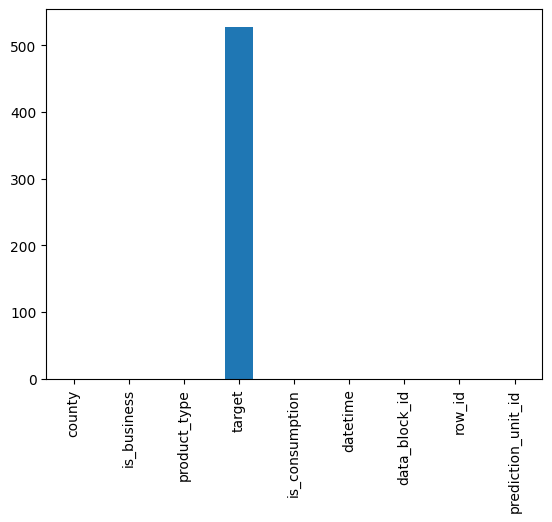

In [19]:
train_df.isna().sum().plot(kind="bar")

In [20]:
train_df.dropna(inplace=True)

<Axes: >

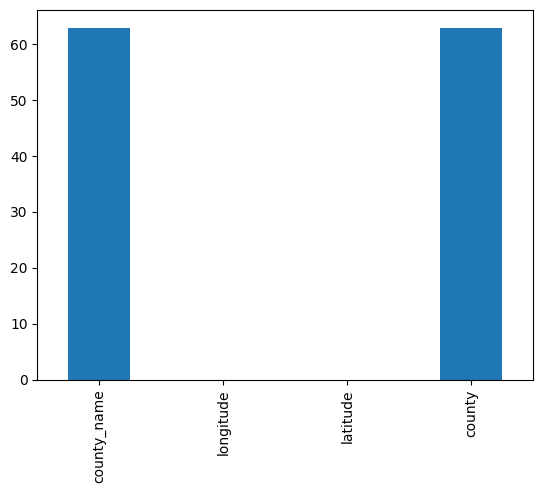

In [21]:
wst_df.isna().sum().plot(kind="bar")

In [22]:
wst_df.shape

(112, 4)

- Majority of 2 columns are null

<Axes: >

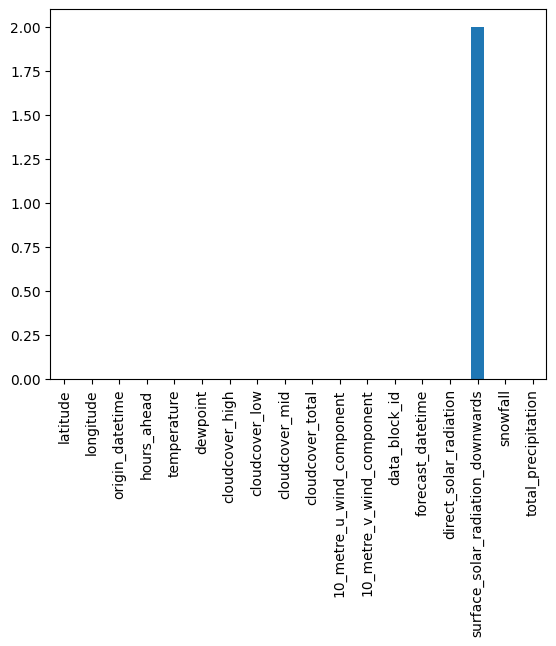

In [23]:
forecast_weather_df.isna().sum().plot(kind="bar")

### Duplicated Values

In [24]:
# function to display duplicated values

def display_duplicated_values():
    for key, df in dfs.items():
        print(key, ": ", df.duplicated().any())

In [25]:
display_duplicated_values()

train :  False
gasprice :  False
elecprice :  False
wst :  False
historical_weather :  False
forecast_weather :  False


In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017824 entries, 0 to 2018351
Data columns (total 9 columns):
 #   Column              Dtype         
---  ------              -----         
 0   county              int64         
 1   is_business         int64         
 2   product_type        int64         
 3   target              float64       
 4   is_consumption      int64         
 5   datetime            datetime64[ns]
 6   data_block_id       int64         
 7   row_id              int64         
 8   prediction_unit_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 153.9 MB


In [27]:
gasprices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   forecast_date          637 non-null    datetime64[ns]
 1   lowest_price_per_mwh   637 non-null    float64       
 2   highest_price_per_mwh  637 non-null    float64       
 3   origin_date            637 non-null    object        
 4   data_block_id          637 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 25.0+ KB


In [28]:
electricity_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15286 entries, 0 to 15285
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   forecast_date  15286 non-null  datetime64[ns]
 1   euros_per_mwh  15286 non-null  float64       
 2   origin_date    15286 non-null  datetime64[ns]
 3   data_block_id  15286 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 477.8 KB


In [29]:
wst_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   county_name  49 non-null     object 
 1   longitude    112 non-null    float64
 2   latitude     112 non-null    float64
 3   county       49 non-null     float64
dtypes: float64(3), object(1)
memory usage: 3.6+ KB


In [30]:
historical_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710802 entries, 0 to 1710801
Data columns (total 18 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   datetime                datetime64[ns]
 1   temperature             float64       
 2   dewpoint                float64       
 3   rain                    float64       
 4   snowfall                float64       
 5   surface_pressure        float64       
 6   cloudcover_total        int64         
 7   cloudcover_low          int64         
 8   cloudcover_mid          int64         
 9   cloudcover_high         int64         
 10  windspeed_10m           float64       
 11  winddirection_10m       int64         
 12  shortwave_radiation     float64       
 13  direct_solar_radiation  float64       
 14  diffuse_radiation       float64       
 15  latitude                float64       
 16  longitude               float64       
 17  data_block_id           float64       
dtypes:

In [31]:
forecast_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424512 entries, 0 to 3424511
Data columns (total 18 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   latitude                           float64       
 1   longitude                          float64       
 2   origin_datetime                    datetime64[ns]
 3   hours_ahead                        int64         
 4   temperature                        float64       
 5   dewpoint                           float64       
 6   cloudcover_high                    float64       
 7   cloudcover_low                     float64       
 8   cloudcover_mid                     float64       
 9   cloudcover_total                   float64       
 10  10_metre_u_wind_component          float64       
 11  10_metre_v_wind_component          float64       
 12  data_block_id                      int64         
 13  forecast_datetime                  datetime64[ns]
 14  di

### Train/Val Split

In [32]:
train_df.sort_values(by="datetime", inplace=True)

val_size= 0.1

split_index = int(len(train_df) * (1 - val_size))

train_data = train_df[:split_index]
val_data = train_df[split_index:]

In [33]:
X_train = train_data.drop(columns=["target"])
X_val = val_data.drop(columns=["target"])
y_train = train_data["target"]
y_val = val_data["target"]

## EDA